In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
import numpy as np
from astropy.io import fits
from scipy.stats import pearsonr

SMALL_SIZE = 8
MEDIUM_SIZE = 9
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)
lims = [[0.1,0.5],[0.6,1.0],np.log([0.25,4.0]),np.log([0.25,4.0]),np.log([0.5,2.0]),np.log([0.5,2.0])]
simpars = ['\Omega_m','\sigma_8','log(A_{SN1})','log(A_{AGN1})','log(A_{SN2})','log(A_{AGN2})']

# import matplotlib.font_manager
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rc('font', family='Times New Roman')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
import seaborn as sns
sns.set_palette("muted")

In [23]:
label_table = np.loadtxt("CosmoAstroSeed_IllustrisTNG_L25n256_LH.txt", skiprows=1, usecols=range(1, 7))
axes = ['x', 'y', 'z']

d = np.load("../wdplus_data.npz")
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdp = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdcross_data.npz")
dat = {axis: d[axis] for axis in axes}
wdx = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

# SSFR < 10^-10.5 M_0/yr
d = np.load("../wdplus_ell_data.npz") # dictionary
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdp_ell = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdcross_ell_data.npz")
dat = {axis: d[axis] for axis in axes}
wdx_ell = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)
# SSFR > 10^-10.5 M_0/yr
d = np.load("../wdplus_spi_data.npz") # dictionary
r = d['r']
dat = {axis: d[axis] for axis in axes}
wdp_spi = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdcross_spi_data.npz")
dat = {axis: d[axis] for axis in axes}
wdx_spi = np.append(np.array(dat['x']), np.append(dat['y'],dat['z'],axis=0),axis=0)

d = np.load("../wdd_data.npz")
wdd = np.array(d['wgg'])


print(corr_labels.shape)
corr_labels = np.vstack((label_table,label_table, label_table))
for i in range(corr_labels.shape[1]):
    if i>1:
        corr_labels[:,i] = np.log(corr_labels[:,i])

(3000, 6)


In [30]:
data = np.loadtxt("../sim_galaxyProperties.txt", skiprows=1)  # Skip the header row
print(data[18,3])
data = np.vstack((data,data, data))
mean_SFR, mean_SSFR, mean_e, std_e = data.T
print(data[1018,3])

0.2737413
0.2737413


(3000,)


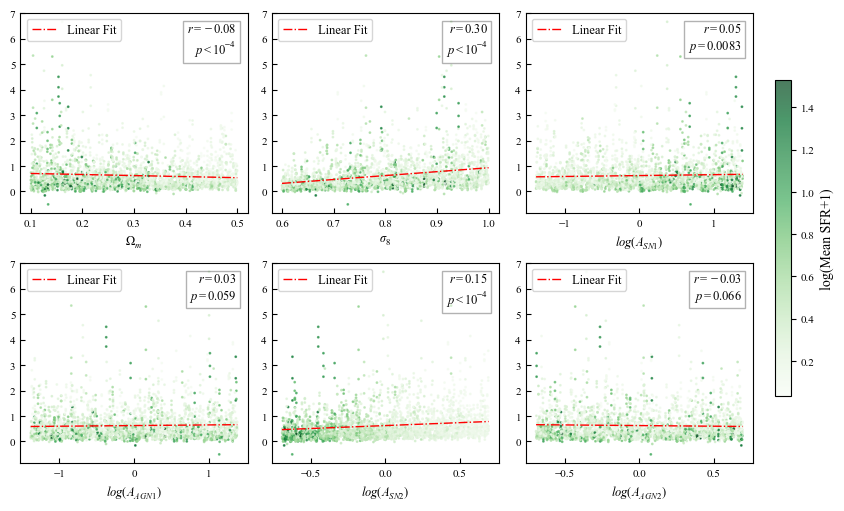

In [54]:
corr_datas = []
corr_data = wdp[:,:]#/wdd[:,:]
weights = 1#/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
corr_datas.append(wtd_corr_data)

print(mean_SFR.shape)
log_mean_SFR =  np.log( mean_SFR +1)

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
#     ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 2),cmap='Blues')
    scatter = ax.scatter(corr_labels[:, param], avg_corr, s=1, c=log_mean_SFR, cmap=mpl.cm.Greens,alpha=0.7,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
#     ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
#     ax.set_ylim([-1, 2.5])
    
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', shrink=0.7, pad=0.02)
cbar.set_label('log(Mean SFR+1)', fontsize=10)
fig.set_constrained_layout(True)
plt.show()

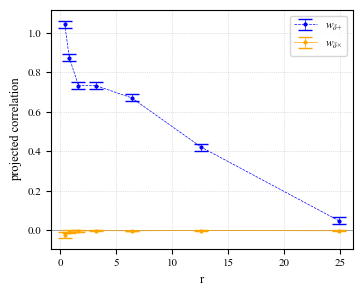

In [15]:
sqrtN = np.sqrt(3000)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(11/3,3))
ax.axhline(0,c='0.5',linewidth=0.5)
ax.errorbar(r,np.mean(wtd_corr_data,axis=0), yerr=np.std(wtd_corr_data,axis=0)/sqrtN, linewidth=0.5, linestyle='--', elinewidth=0.5
               , capsize=5 ,label=r'$w_{\delta{+}}$', marker='o',markersize=2, color='blue')
ax.errorbar(r,np.mean(wdx,axis=0), yerr=np.std(wdx,axis=0)/sqrtN, linewidth=0.5, elinewidth=0.5 
               , capsize=5,label=r'$w_{\delta {\times}}$', marker='o',markersize=2, color='orange')
ax.grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)
#ax.set_ylim(-np.abs(ax.get_ylim()).max(), 0.4*np.abs(ax.get_ylim()).max())
# ax[0].set_title(r"LH (0 - 1000) average position-shape")
ax.set_xlabel("r")
ax.set_ylabel(r"projected correlation")
ax.legend() 
fig.tight_layout()

In [11]:
wdp.shape

(3000, 7)

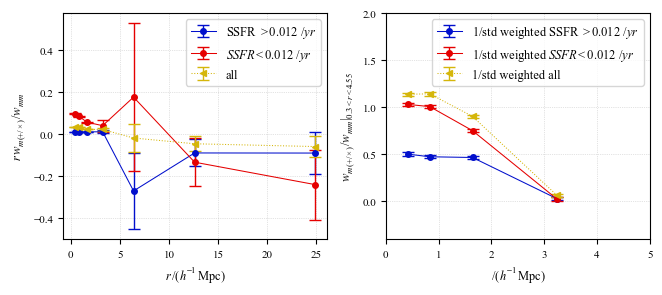

In [24]:
d_wgp_spi = wdp_spi[:]/wdd
d_wgp_ell = wdp_ell[:]/wdd
d_wgp = wdp[:]/wdd
sqrtN = np.sqrt(3000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20/3, 3))
ax[0].errorbar(
    r, np.mean(d_wgp_spi, axis=0), yerr=np.std(d_wgp_spi, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'SSFR $>0.012$ $ /yr$', marker='o', markersize=4
)
ax[0].errorbar(
    r, np.mean(d_wgp_ell, axis=0), yerr=np.std(d_wgp_ell, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:red',
    label=r'$SSFR<0.012$ $ /yr$', marker='o', markersize=4
)
ax[0].errorbar(
    r, np.mean(d_wgp, axis=0), yerr=np.std(d_wgp, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:dark yellow',
    label=r'all', marker='<', markersize=4
)
# Grid and scaling
ax[0].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

# Axis labels and titles
ax[0].set_xlabel(r"$r \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[0].set_ylabel(r"$r\,w_{m(+/\times)}/w_{mm}$",fontsize=9)
ax[0].legend(fontsize=9)

corr_data = d_wgp_spi[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
ax[1].errorbar(
    r[:4], np.mean(wtd_corr_data, axis=0), yerr=np.std(wtd_corr_data, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:true blue',
    label=r'1/std weighted SSFR $>0.012$ $ /yr$', marker='o', markersize=4
)
corr_data = d_wgp_ell[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
ax[1].errorbar(
    r[:4], np.mean(wtd_corr_data, axis=0), yerr=np.std(wtd_corr_data, axis=0) / sqrtN,
    linewidth=0.75, linestyle='-', elinewidth=1, capsize=4, color='xkcd:red',
    label=r'1/std weighted $SSFR<0.012$ $ /yr$', marker='o', markersize=4
)
corr_data = d_wgp[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
ax[1].errorbar(
    r[:4], np.mean(wtd_corr_data, axis=0), yerr=np.std(wtd_corr_data, axis=0) / sqrtN,
    linewidth=0.75, linestyle=':', elinewidth=1, capsize=4, color='xkcd:dark yellow',
    label=r'1/std weighted all', marker='<', markersize=4
)
# Grid and scaling
ax[1].grid(which='both', linestyle='dotted', linewidth=0.5, alpha=0.7)

# Axis labels and titles
ax[1].set_xlabel(r"$ \, /(h^{-1} \, \mathrm{Mpc})$",fontsize=9)
ax[1].set_ylabel(r"$\,w_{m(+/\times)}/w_{mm}|_{0.3<r<4.55}$",fontsize=9)
ax[1].legend(fontsize=9)
ax[1].set_xlim([0,5])
ax[1].set_ylim([-0.4,2])
# Adjust layout and save
fig.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/wd+_wdd SSFR split.pdf', dpi=300)


### Spirals: SSFR > $10^{-10.5}\, M_\odot /yr$ 

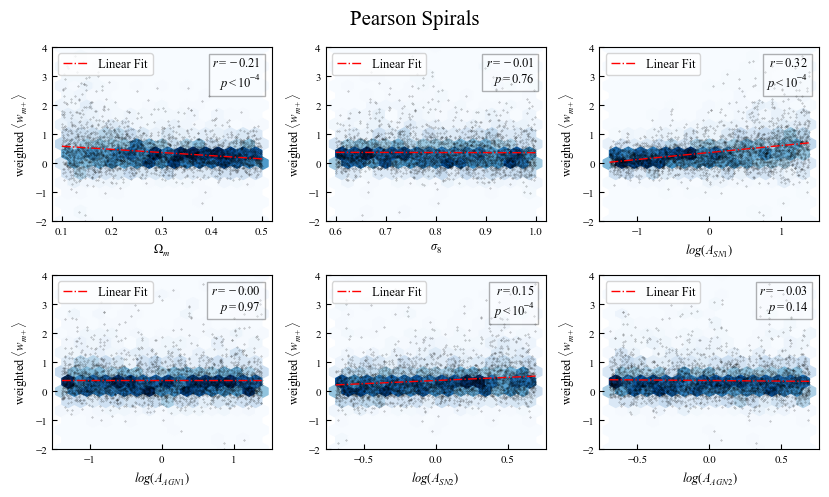

In [39]:
corr_data = wdp_spi[:,:]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
fig.suptitle('Pearson Spirals',fontsize=15)
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -2, 4),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-2, 4])
plt.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/wd+ spirals dependencies.pdf', dpi=300)
plt.show()

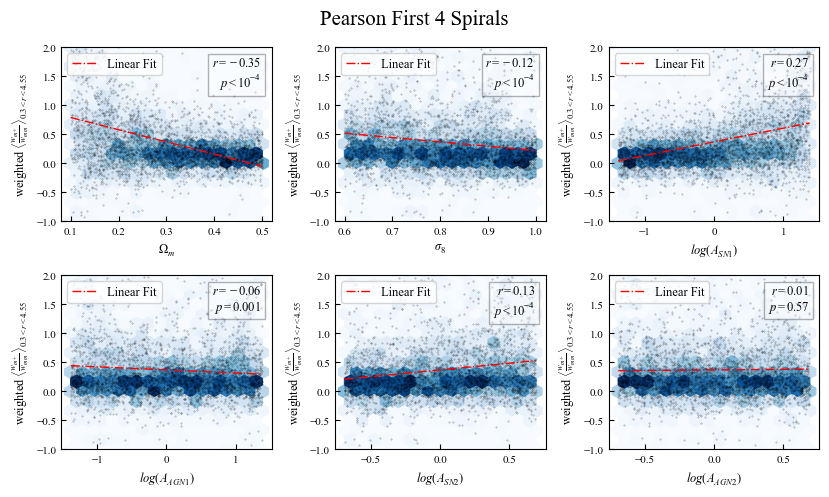

In [8]:
corr_data = wdp_spi[:,:4]/wdd[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
corr_datas.append(wtd_corr_data)

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
fig.suptitle('Pearson First 4 Spirals',fontsize=15)
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 2),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-1, 2])
plt.tight_layout()
plt.show()

### Ellipticals: SSFR < $10^{-10.5}\, M_\odot /yr$ 

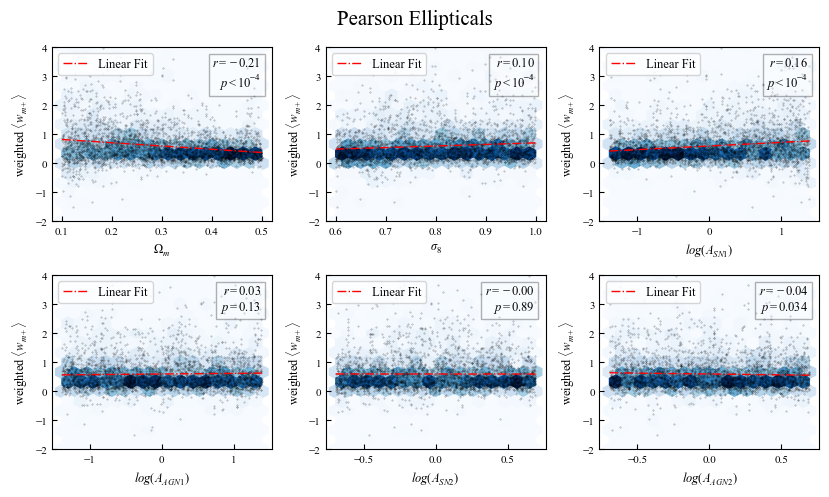

In [38]:
corr_data = wdp_ell[:,:]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
fig.suptitle('Pearson Ellipticals',fontsize=15)
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -2, 4),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle w_{m+} \rangle$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-2, 4])
plt.tight_layout()
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/wd+ ellipticals dependencies.pdf', dpi=300)
plt.show()

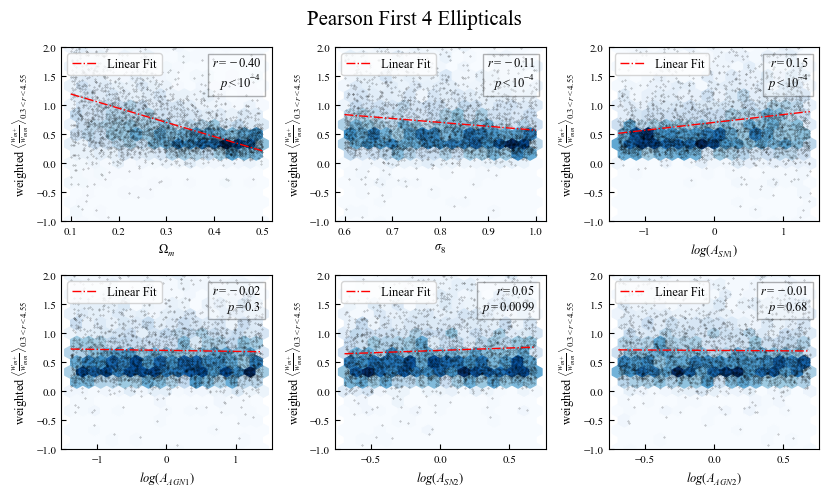

In [9]:
corr_data = wdp_ell[:,:4]/wdd[:,:4]
weights = 1/np.std(corr_data,axis=0)
wtd_corr_data = corr_data*weights
corr_datas.append(wtd_corr_data)

fig, axes = plt.subplots(2, 3, figsize=(25/3, 5))  # 2 rows, 3 columns
axes = axes.flatten()  
fig.suptitle('Pearson First 4 Ellipticals',fontsize=15)
for param in range(6):
    ax = axes[param]
    avg_corr = np.mean(wtd_corr_data, axis=1)
    pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])

    # Fit a straight line (linear regression)
    slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
    x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
    y_vals = slope * x_vals + intercept

    # Plot the trend line
#     ax.axhline(np.mean(wtd_corr_data), c='0.5', linewidth=0.2, linestyle='-',label='')
    ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
    
    if p_value>1e-4:
        ax.text( 0.95, 0.95, 
        f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
        transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
    else:
        ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n"+r'$p<10^{-4}$', transform=ax.transAxes, 
        fontsize=9, verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle="square", edgecolor='black',facecolor='white', alpha=0.3))
    
    ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 2),cmap='Blues')
    ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black',alpha=0.4,label="")
    
    ax.set_xlabel(f"${simpars[param]}$",fontsize=9)
    ax.set_ylabel(r"weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$",fontsize=9)
    ax.legend(fontsize=9,loc='upper left')
    ax.tick_params(direction='in')
    ax.set_ylim([-1, 2])
plt.tight_layout()
plt.show()

### All

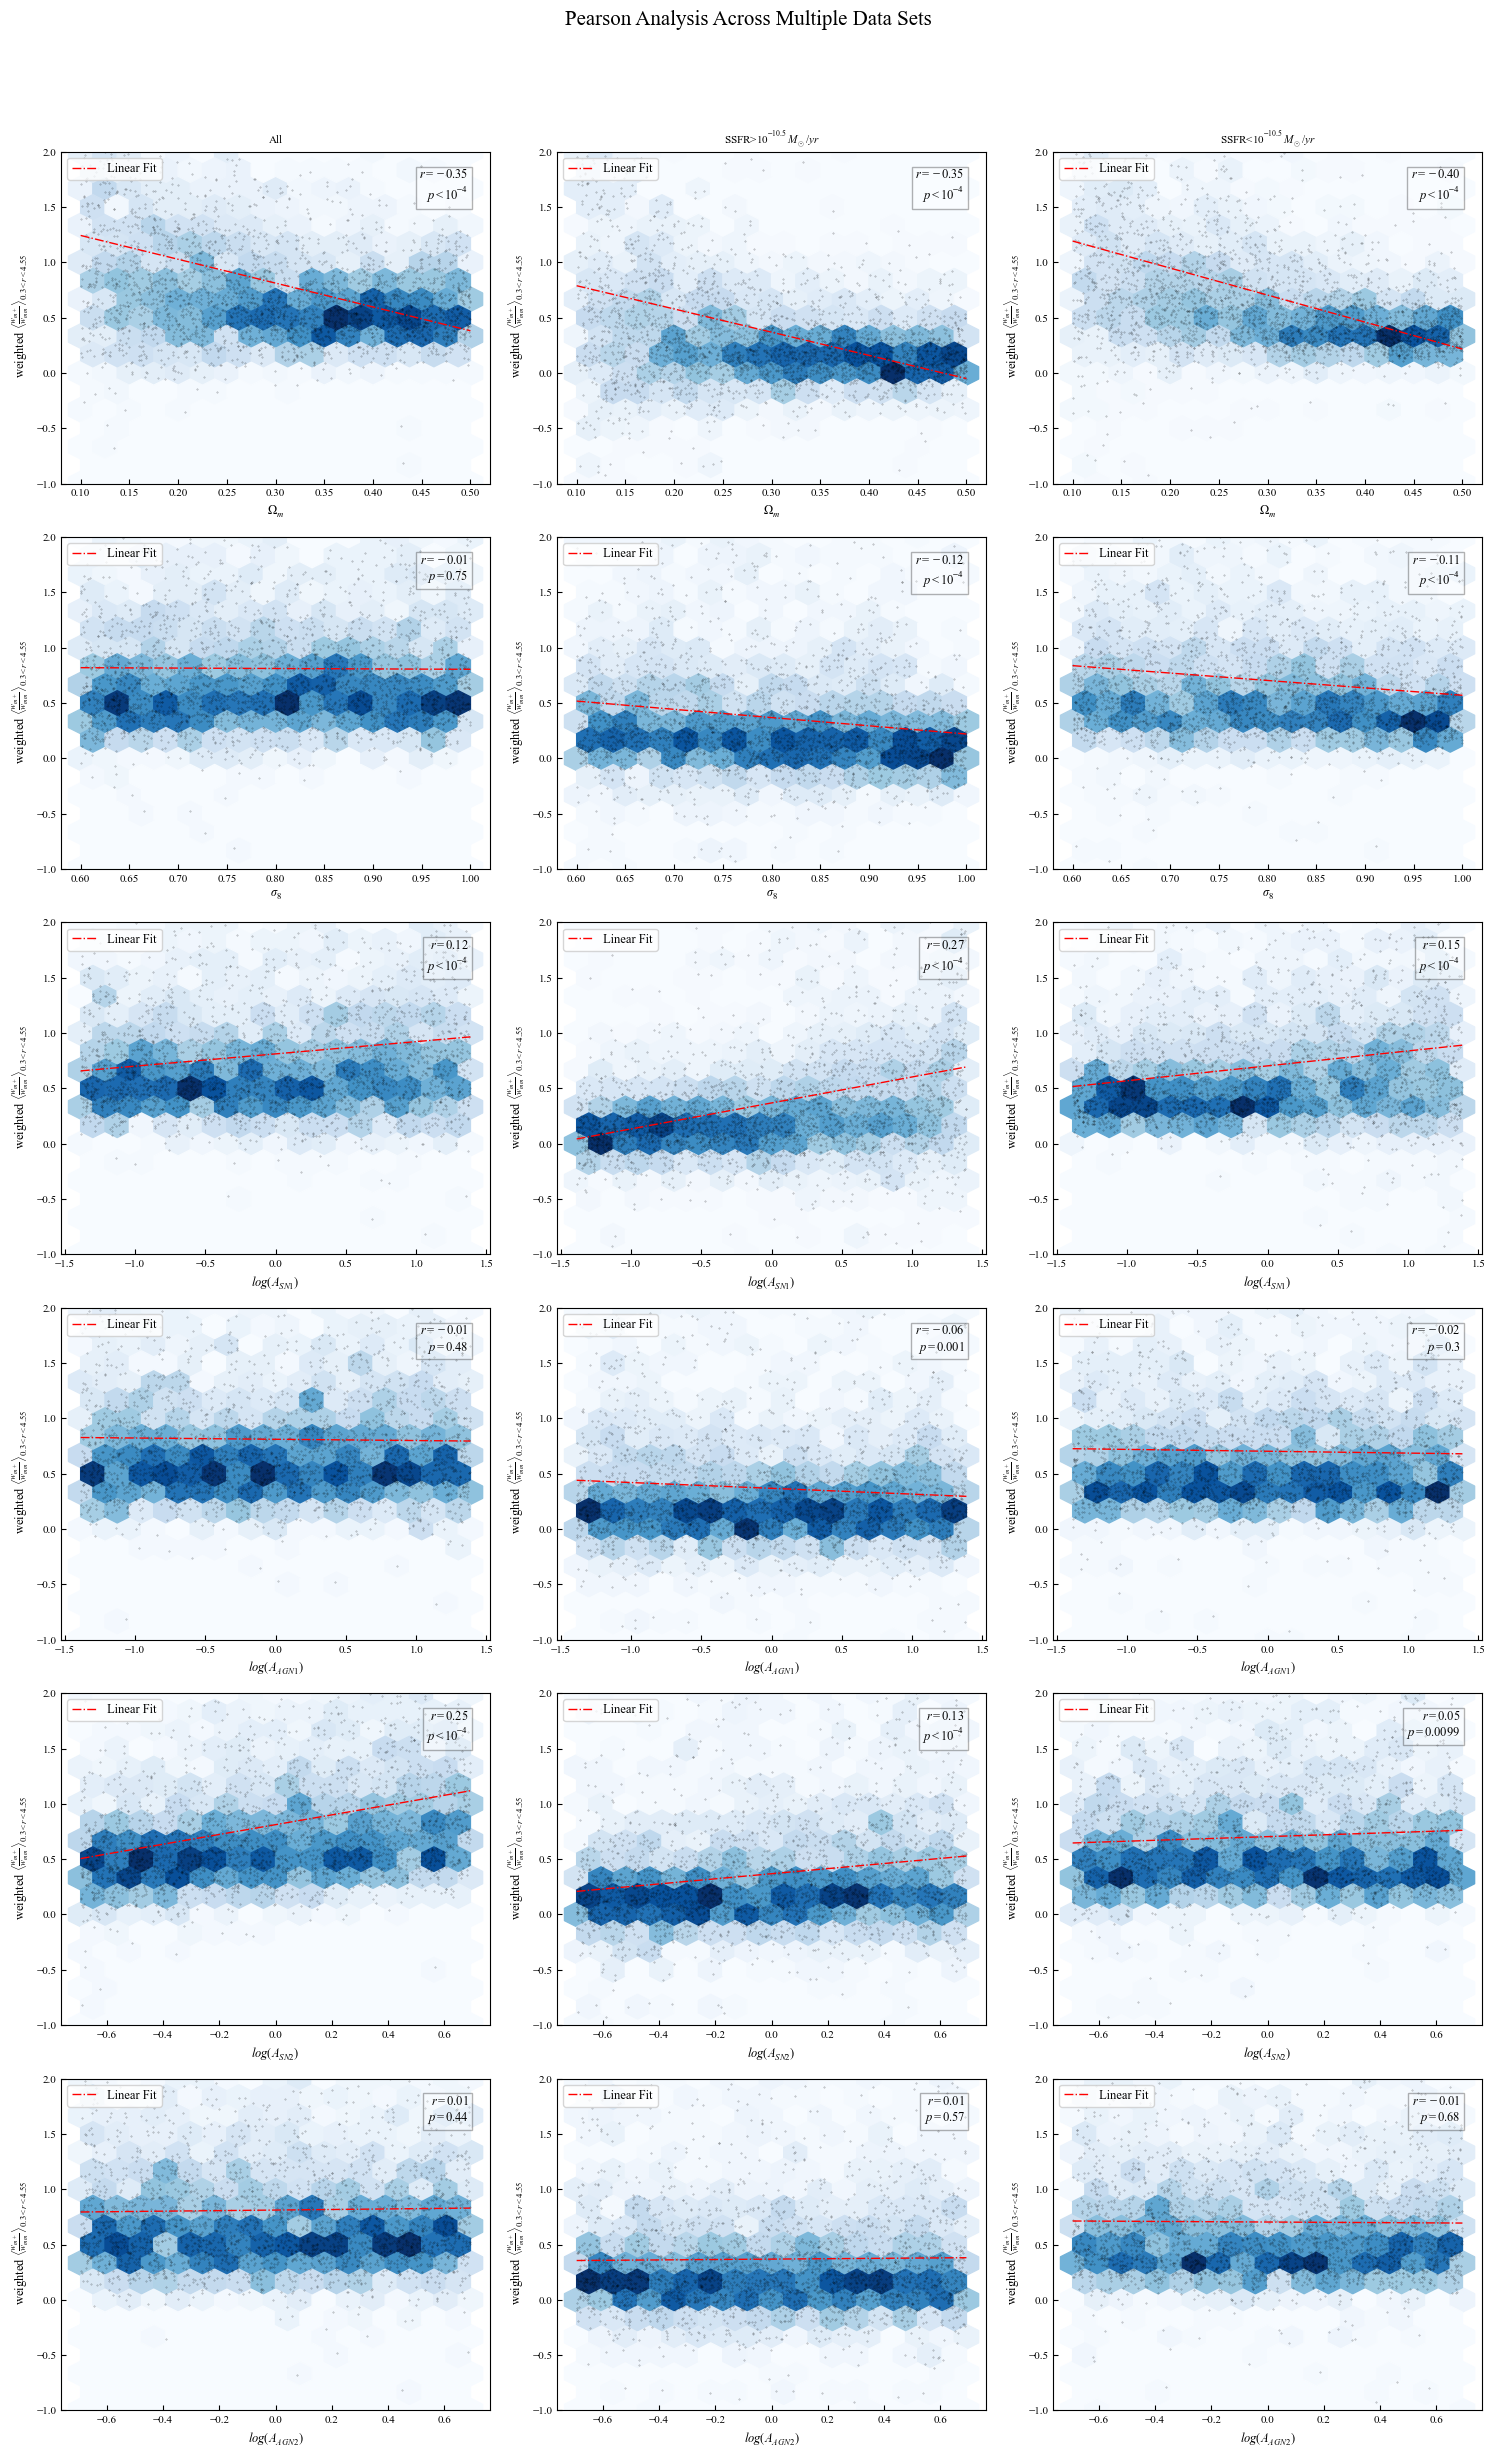

In [12]:
fig, axes = plt.subplots(6, 3, figsize=(15, 25))  # 3 rows, 6 columns
fig.suptitle('Pearson Analysis Across Multiple Data Sets', fontsize=15)
axes = axes.reshape(6, 3)  # Ensure axes is a 2D array for easy indexing

for i, wtd_corr_data in enumerate(corr_datas):  # Loop over datasets (rows)
    avg_corr = np.mean(wtd_corr_data, axis=1)
    for param in range(6):  # Loop over parameters (columns)
        ax = axes[param, i]
        
        # Pearson correlation
        pearson_coeff, p_value = pearsonr(avg_corr, corr_labels[:, param])
        
        # Linear fit
        slope, intercept = np.polyfit(corr_labels[:, param], avg_corr, 1)
        x_vals = np.linspace(min(lims[param]), max(lims[param]), 10)
        y_vals = slope * x_vals + intercept
        
        # Plot trend line
        ax.plot(x_vals, y_vals, lw=1, color='red', linestyle='-.', label=f"Linear Fit")
        
        # Add correlation statistics
        if p_value > 1e-4:
            ax.text(0.95, 0.95, 
                    f"$r={pearson_coeff:.2f}$\n$p={p_value:.2g}".replace('e', r'\times10^{').replace('-', r'-') + "}$",
                    transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
        else:
            ax.text(0.95, 0.95, f"$r={pearson_coeff:.2f}$\n" + r'$p<10^{-4}$',
                    transform=ax.transAxes, fontsize=9, verticalalignment='top', horizontalalignment='right',
                    bbox=dict(boxstyle="square", edgecolor='black', facecolor='white', alpha=0.3))
        
        # Plot hexbin and scatter
        ax.hexbin(corr_labels[:, param], avg_corr, gridsize=16, extent=(lims[param][0], lims[param][1], -1, 2), cmap='Blues')
        ax.scatter(corr_labels[:, param], avg_corr, s=0.1, color='black', alpha=0.4)
#         ax.axhline(np.mean(avg_corr), c='0.5', linewidth=0.2, linestyle='-',label='')
        # Set axis labels
        ax.set_xlabel(f"${simpars[param]}$", fontsize=9)

        ax.set_ylabel(r" weighted $\langle \frac{w_{m+}}{w_{mm}} \rangle_{0.3<r<4.55}$", fontsize=9)
        
        ax.legend(fontsize=9, loc='upper left')
        ax.tick_params(direction='in')
        ax.set_ylim([-1, 2])

axes[0, 0].set_title('All')
axes[0, 1].set_title('SSFR>$10^{-10.5}\, M_\odot /yr$')
axes[0, 2].set_title('SSFR<$10^{-10.5}\, M_\odot /yr$')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.savefig('/Users/danie/Library/CloudStorage/OneDrive-Personal/Physics UCL/Year 3/Astro Research Project 2023/Ell Spi alalysis.pdf', dpi=300)
plt.show()
